**Домашнее задание 1.10.**   
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель 
(например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016  

https://plot.ly/~desiindah/6/suicide-rates-overview-1985-to-2016-/#/

In [90]:
#Импорт библиотек
from pylab import rcParams
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv('F:\\Program\\git_base\\GitHub\\MyRepo\\PYDA_10\\master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [9]:
# Посчитать кол-во суицидов в целом по стране
def suicides(a):
     return  a['suicides/100k pop'] * a['population'] / 100000

In [84]:
df['suicides_all'] = df.apply(suicides, axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_all
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,20.99559
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,15.98520
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,13.99251
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1.00062
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,8.99704


In [85]:
# Сформулируем датафрейм по штатам
df_usa = df[df['country'] == 'United States']
df_usa.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_all
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,2177.0848
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,5301.4450
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers,5133.1756
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent,6054.3153
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X,4267.8756


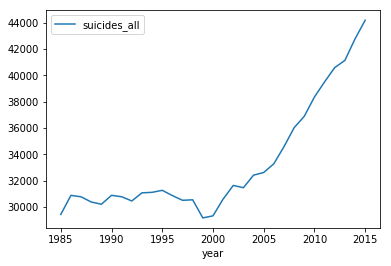

In [88]:
# Построим график изменения по годам. Строим сводную таблицу, рассчитываем суммарные по годам. потом график
df_usa.pivot_table(index = 'year', values = 'suicides_all', aggfunc = 'sum', fill_value = 0).plot()  

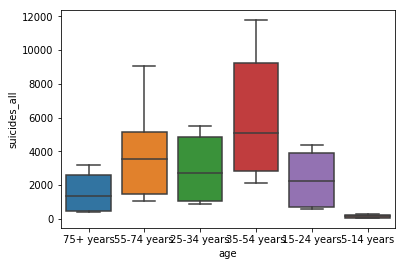

In [117]:
# Теперь боксплот по возрасту:

# df_usa_age = df_usa.age.value_counts().sort_values(ascending = False).head(5).index.values
# top_platforms
sns.boxplot(x="age", y="suicides_all",data=df_usa, )

In [94]:
?sns.boxplot

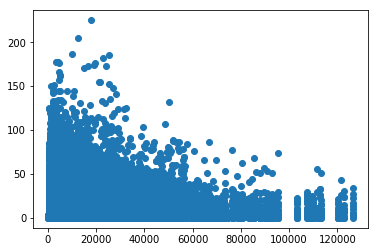

In [13]:
plt.scatter(df['gdp_per_capita ($)'],df['suicides/100k pop'])

<Container object of 27820 artists>

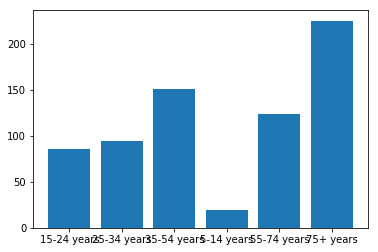

In [14]:
plt.bar(df['age'],df['suicides/100k pop'])

(array([4990.,    0., 2744.,    0., 6408.,    0., 1470.,    0., 5844.,
        6364.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

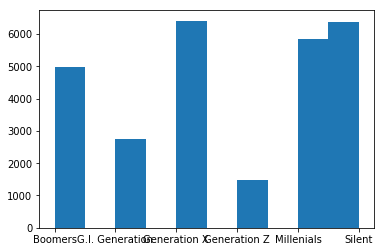

In [16]:
plt.hist(df['generation']) 

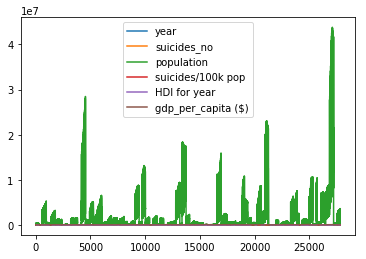

In [17]:
df.plot()

In [22]:
# df.plot(kind='pie', y='population')

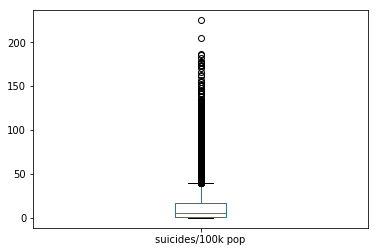

In [30]:
df['suicides/100k pop'].plot(kind='box')

In [24]:
import seaborn as sns

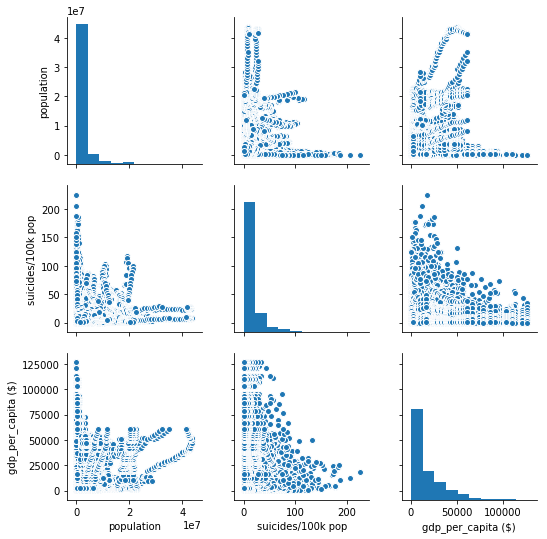

In [28]:
sns_plot = sns.pairplot(
    df[['population', 'suicides/100k pop','gdp_per_capita ($)']])
sns_plot

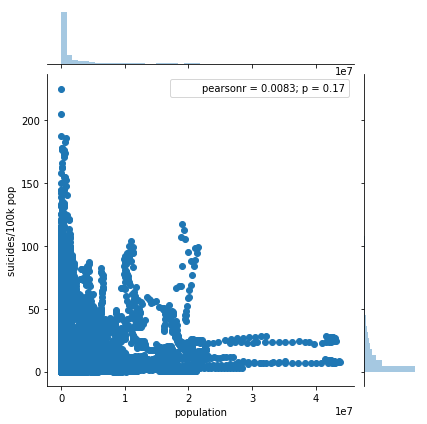

In [29]:
sns.jointplot(x='population', y='suicides/100k pop', 
              data=df, kind='scatter')

In [31]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [48]:
def suicides(a):
     return  a['suicides/100k pop'] * a['population'] / 100000

In [50]:
df['suicides_all'] = df.apply(suicides, axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_all
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,20.99559
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,15.98520
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,13.99251
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1.00062
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,8.99704


In [52]:
df.groupby(['country', 'year']).sum().head()

suicides_no  population  suicides/100k pop  HDI for year  \
country year                                                             
Albania 1987           73     2709600              31.85           0.0   
        1988           63     2764300              32.46           0.0   
        1989           68     2803100              33.40           0.0   
        1992           47     2822500              18.00           0.0   
        1993           73     2807300              32.56           0.0   

              gdp_per_capita ($)  suicides_all  
country year                                    
Albania 1987                9552      72.98159  
        1988                9228      63.05383  
        1989                9996      68.02484  
        1992                3012      46.98836  
        1993                5244      72.95040

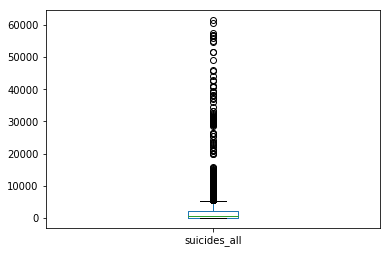

In [54]:
df.groupby(['country', 'year']).sum()['suicides_all'].plot(kind='box')

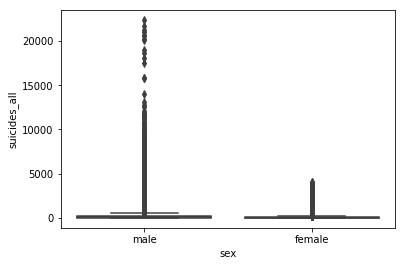

In [59]:
top_platforms = df.sex.value_counts().sort_values(ascending = False).head(5).index.values
top_platforms
sns.boxplot(x="sex", y="suicides_all", 
            data=df[df.sex.isin(top_platforms)])

<Container object of 27820 artists>

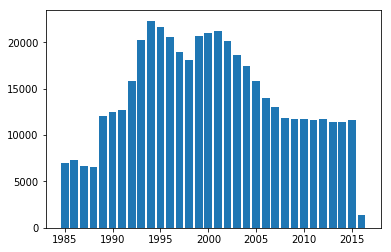

In [60]:
plt.bar(df['year'],df['suicides_all'])

(array([2388., 2160., 2376., 2784., 2976., 3120., 3036., 3120., 3060.,
        2800.]),
 array([1985. , 1988.1, 1991.2, 1994.3, 1997.4, 2000.5, 2003.6, 2006.7,
        2009.8, 2012.9, 2016. ]),
 <a list of 10 Patch objects>)

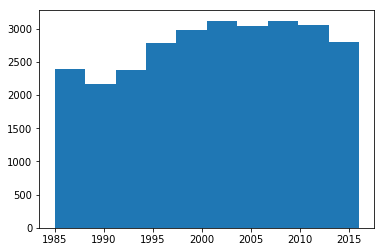

In [61]:
plt.hist(df['year']) 

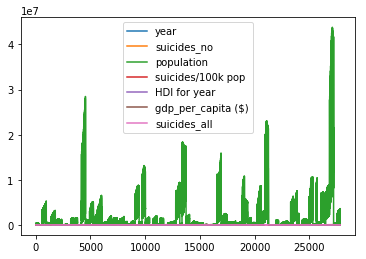

In [62]:
df.plot()

<Container object of 27820 artists>

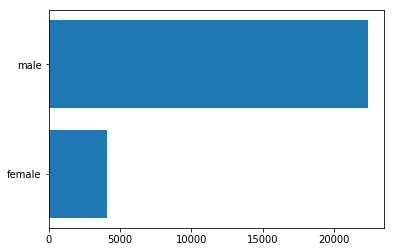

In [63]:
# Столбчатая диаграмма 
plt.barh(df['sex'], df['suicides_all'])

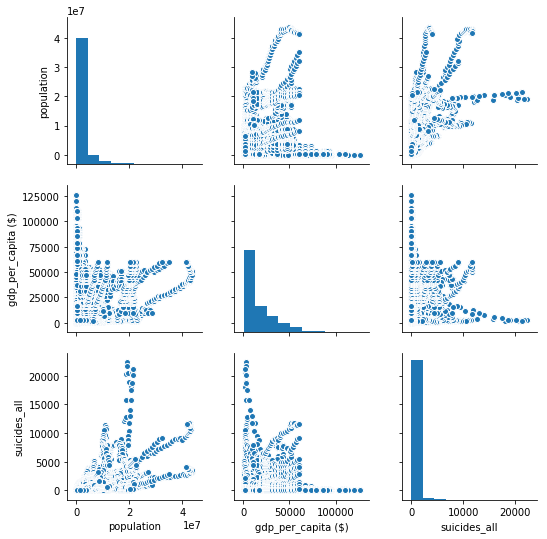

In [65]:
import seaborn as sns
sns_plot = sns.pairplot(
    df[['population', 'gdp_per_capita ($)', 'suicides_all']])
sns_plot

In [71]:
df.head(5)
platform_genre_sales = df.pivot_table(
                        index='year', 
                        columns='age', 
                        values='suicides_all', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
1985,17871.180751,20769.942604,35747.407869,984.555158,28735.997366,11954.356362
1986,18063.127946,21687.030487,37557.128296,945.856526,29760.822303,12660.177941
1987,16433.625250,22309.774608,40649.683807,937.073924,32469.078114,14048.078307
1988,15335.328214,21331.528073,38773.203289,836.280223,30539.847235,14212.177876
1989,18634.617274,29427.515285,53542.996725,1150.604784,40086.572959,17402.573452
1990,23248.029712,35277.645693,65245.305884,1477.624313,47016.634762,21099.838128
1991,23318.098075,35615.256141,68375.714888,1532.799564,48314.058285,20865.658655
1992,24727.138141,37757.649481,75049.549822,1684.151649,51506.498861,20743.840924
1993,25262.081742,39045.273819,80669.855783,1789.430057,54278.975784,20522.120251


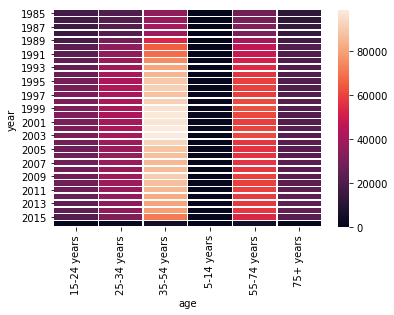

In [72]:
sns.heatmap(platform_genre_sales, linewidths=0.5)